In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('bank_nifty_new.csv')
df.datetime = pd.to_datetime(df.datetime, format='%d-%m-%Y %H:%M')
df = df.set_index("datetime")
df = df.between_time('09:15:00', '15:29:00')
bnf = df.groupby(pd.Grouper(freq='15Min')).agg({"open": "first", "close": "last", "low": "min", "high": "max"})
bnf.columns = ["open", "close", "low", "high"]

In [52]:
df

,symbol,open,high,low,close,volume
datetime,,,,,,
2017-01-02 09:15:00,NIFTYBANK,18248.20,18248.20,18175.90,18181.85,0
2017-01-02 09:16:00,NIFTYBANK,18182.25,18194.70,18179.95,18184.95,0
2017-01-02 09:17:00,NIFTYBANK,18184.70,18189.25,18133.80,18135.10,0
2017-01-02 09:18:00,NIFTYBANK,18132.35,18141.55,18118.55,18138.95,0
2017-01-02 09:19:00,NIFTYBANK,18139.50,18142.55,18120.45,18123.95,0
...,...,...,...,...,...,...
2022-10-03 15:25:00,NIFTYBANK,38004.60,38020.95,38004.60,38008.55,0
2022-10-03 15:26:00,NIFTYBANK,38011.95,38015.70,38001.20,38006.70,0
2022-10-03 15:27:00,NIFTYBANK,38003.95,38013.65,37990.85,38002.15,0


In [53]:
bnf

,open,close,low,high
datetime,,,,
2017-01-02 09:15:00,18248.20,18051.25,18051.25,18248.20
2017-01-02 09:30:00,18050.10,18048.25,17995.40,18052.35
2017-01-02 09:45:00,18048.20,18019.65,18003.60,18048.55
2017-01-02 10:00:00,18020.20,18017.10,18007.90,18040.95
2017-01-02 10:15:00,18017.50,18015.55,18014.45,18035.75
...,...,...,...,...
2022-10-03 14:15:00,38194.60,38160.20,38140.20,38248.05
2022-10-03 14:30:00,38160.80,38033.15,38030.35,38163.85
2022-10-03 14:45:00,38036.65,38027.40,37963.25,38056.10


In [54]:
df2 = pd.read_csv('NIFTY50.csv')
df2.datetime = pd.to_datetime(df2.datetime, format='%Y-%m-%d %H:%M:%S')
df2 = df2.set_index("datetime")
df2 = df2.between_time('09:15:00', '15:29:00')
nf = df2.groupby(pd.Grouper(freq='5Min')).agg({"open": "first", "close": "last", "low": "min", "high": "max"})
nf.columns = ["open", "close", "low", "high"]

In [55]:
df2

,symbol,open,high,low,close,volume
datetime,,,,,,
2017-07-17 09:15:00,NIFTY50,9908.15,9908.50,9900.50,9900.50,0
2017-07-17 09:16:00,NIFTY50,9901.90,9905.85,9899.50,9904.35,0
2017-07-17 09:17:00,NIFTY50,9904.45,9906.80,9903.30,9903.30,0
2017-07-17 09:18:00,NIFTY50,9903.35,9908.90,9903.35,9907.80,0
2017-07-17 09:19:00,NIFTY50,9907.00,9911.60,9905.35,9910.15,0
...,...,...,...,...,...,...
2022-10-03 15:25:00,NIFTY50,16880.65,16884.45,16879.90,16880.45,0
2022-10-03 15:26:00,NIFTY50,16881.60,16885.80,16881.15,16885.15,0
2022-10-03 15:27:00,NIFTY50,16885.40,16885.40,16880.10,16881.00,0


In [56]:
nf

,open,close,low,high
datetime,,,,
2017-07-17 09:15:00,9908.15,9910.15,9899.50,9911.60
2017-07-17 09:20:00,9910.20,9907.65,9901.45,9910.20
2017-07-17 09:25:00,9907.45,9911.65,9906.05,9913.90
2017-07-17 09:30:00,9911.95,9909.00,9907.20,9915.15
2017-07-17 09:35:00,9908.95,9903.75,9898.75,9909.00
...,...,...,...,...
2022-10-03 15:05:00,16884.85,16897.90,16878.25,16898.65
2022-10-03 15:10:00,16900.55,16891.25,16886.30,16901.25
2022-10-03 15:15:00,16892.85,16895.45,16884.80,16898.05


In [57]:
bnf = bnf.dropna(subset=['open'])
nf = nf.dropna(subset=['open'])

In [58]:
bnf

,open,close,low,high
datetime,,,,
2017-01-02 09:15:00,18248.20,18051.25,18051.25,18248.20
2017-01-02 09:30:00,18050.10,18048.25,17995.40,18052.35
2017-01-02 09:45:00,18048.20,18019.65,18003.60,18048.55
2017-01-02 10:00:00,18020.20,18017.10,18007.90,18040.95
2017-01-02 10:15:00,18017.50,18015.55,18014.45,18035.75
...,...,...,...,...
2022-10-03 14:15:00,38194.60,38160.20,38140.20,38248.05
2022-10-03 14:30:00,38160.80,38033.15,38030.35,38163.85
2022-10-03 14:45:00,38036.65,38027.40,37963.25,38056.10


In [59]:
nf

,open,close,low,high
datetime,,,,
2017-07-17 09:15:00,9908.15,9910.15,9899.50,9911.60
2017-07-17 09:20:00,9910.20,9907.65,9901.45,9910.20
2017-07-17 09:25:00,9907.45,9911.65,9906.05,9913.90
2017-07-17 09:30:00,9911.95,9909.00,9907.20,9915.15
2017-07-17 09:35:00,9908.95,9903.75,9898.75,9909.00
...,...,...,...,...
2022-10-03 15:05:00,16884.85,16897.90,16878.25,16898.65
2022-10-03 15:10:00,16900.55,16891.25,16886.30,16901.25
2022-10-03 15:15:00,16892.85,16895.45,16884.80,16898.05


In [60]:
df3 = pd.merge(nf['close'], bnf['close'], left_index=True, right_index=True)
df3 = df3.rename(columns={'close_x': 'Nifty', 'close_y': 'Bank Nifty'})

In [61]:
df3

,Nifty,Bank Nifty
datetime,,
2017-07-17 09:15:00,9910.15,23974.95
2017-07-17 09:30:00,9909.00,23919.80
2017-07-17 09:45:00,9909.10,23976.85
2017-07-17 10:00:00,9910.85,23968.30
2017-07-17 10:15:00,9914.60,23989.10
...,...,...
2022-10-03 14:15:00,16949.45,38160.20
2022-10-03 14:30:00,16909.45,38033.15
2022-10-03 14:45:00,16881.20,38027.40


In [62]:
df3['spread'] = np.log(df3['Bank Nifty']) - np.log(df3['Nifty'])
hold_periods = [5, 10, 15, 20, 25] 

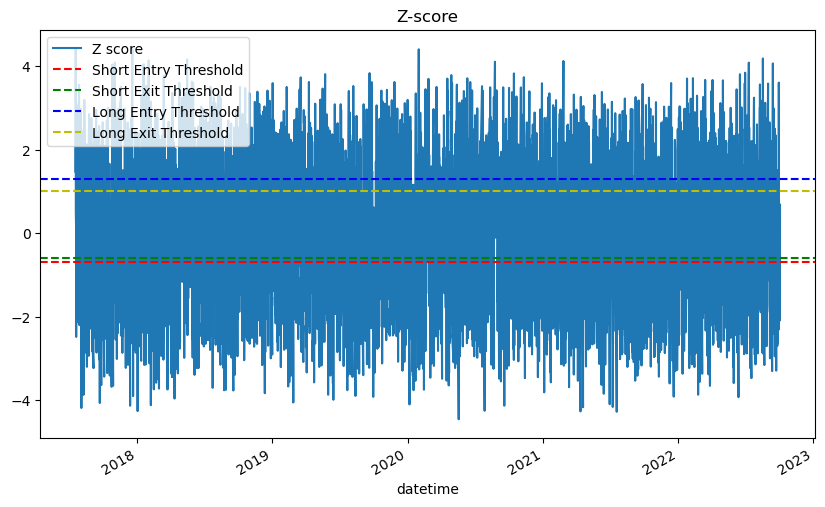

In [69]:
# Display Z-score DataFrame
df3['Z score'].plot(figsize=(10, 6))
plt.axhline(y=-0.7, color='r', linestyle='--', label='Short Entry Threshold')
plt.axhline(y=-0.6, color='g', linestyle='--', label='Short Exit Threshold')
plt.axhline(y=1.3, color='b', linestyle='--', label='Long Entry Threshold')
plt.axhline(y=1, color='y', linestyle='--', label='Long Exit Threshold')
plt.title('Z-score')
plt.legend()
plt.show()

In [64]:
results = []
for hold_period in hold_periods:
    df3['RM_SPREAD'] = df3['spread'].rolling(hold_period).mean()
    df3['std'] = df3['spread'].rolling(window=hold_period).std()
    df3['Z score'] = (df3['spread'] - df3['RM_SPREAD']) / df3['std']

    status = 0
    pnl = pd.DataFrame(columns=["Nifty", "Bnknifty", "Entry_time", "Exit_time", "Ent_price_nifty", "Ent_price_bnknifty",
                                "Exit_price_nifty", "Exit_price_bnknift", "Points", "Pnl"])
    for row, value in df3.iterrows():
        if status == 0 and value["Z score"] < -0.7:
            status = 1
            entry_price1 = value["Nifty"]
            entry_price2 = value["Bank Nifty"]
            entry_time = row
            continue
        elif status == 1 and value["Z score"] > -0.6:
            pnl.loc[len(pnl)] = ["Short", "Short", entry_time, row, entry_price1, entry_price2, value["Nifty"],
                                 value["Bank Nifty"], (entry_price1 - value["Nifty"]) + (entry_price2 - value["Bank Nifty"]),
                                 (entry_price1 - value["Nifty"]) * 50 + (entry_price2 - value["Bank Nifty"]) * 25]
            status = 0
            continue

        if status == 0 and value["Z score"] > 1.3:
            status = 2
            entry_price1 = value["Nifty"]
            entry_price2 = value["Bank Nifty"]
            entry_time = row
            continue
        elif status == 2 and value["Z score"] < 1:
            pnl.loc[len(pnl)] = ["Long", "Short", entry_time, row, entry_price1, entry_price2, value["Nifty"],
                                 value["Bank Nifty"], (value["Nifty"] - entry_price1) + (entry_price2 - value["Bank Nifty"]),
                                 (value["Nifty"] - entry_price1) * 50 + (entry_price2 - value["Bank Nifty"]) * 25]
            status = 0

    pnl['Cumulative PNL'] = pnl['Pnl'].cumsum()
    total_profit = pnl['Pnl'].sum()
    results.append((hold_period, total_profit))

In [65]:
# Display PNL DataFrame
print("PNL DataFrame:")
pnl

PNL DataFrame:


,Nifty,Bnknifty,Entry_time,Exit_time,Ent_price_nifty,Ent_price_bnknifty,Exit_price_nifty,Exit_price_bnknift,Points,Pnl,Cumulative PNL
0,Long,Short,2017-07-17 15:15:00,2017-07-18 13:00:00,9918.90,24030.30,9847.55,24060.90,-101.95,-4332.50,-4332.50
1,Long,Short,2017-07-18 13:15:00,2017-07-18 13:30:00,9843.80,24108.40,9852.75,24071.05,46.30,1381.25,-2951.25
2,Short,Short,2017-07-19 09:30:00,2017-07-19 09:45:00,9873.45,24101.65,9858.55,24129.10,-12.55,58.75,-2892.50
3,Short,Short,2017-07-19 10:45:00,2017-07-19 11:00:00,9876.05,24122.05,9870.40,24120.05,7.65,332.50,-2560.00
4,Short,Short,2017-07-19 12:30:00,2017-07-19 13:00:00,9887.70,24154.00,9875.05,24148.40,18.25,772.50,-1787.50
...,...,...,...,...,...,...,...,...,...,...,...
4182,Short,Short,2022-09-29 11:00:00,2022-09-29 14:00:00,16945.45,37925.75,16829.15,37641.90,400.15,12911.25,4603507.50
4183,Long,Short,2022-09-30 09:30:00,2022-09-30 09:45:00,16770.10,37710.85,16824.50,37694.25,71.00,3135.00,4606642.50
4184,Long,Short,2022-09-30 10:00:00,2022-09-30 13:00:00,16844.10,37829.70,17092.90,38579.80,-501.30,-6312.50,4600330.00
4185,Short,Short,2022-10-03 09:15:00,2022-10-03 11:00:00,17071.95,38422.35,16958.10,38249.50,286.70,10013.75,4610343.75


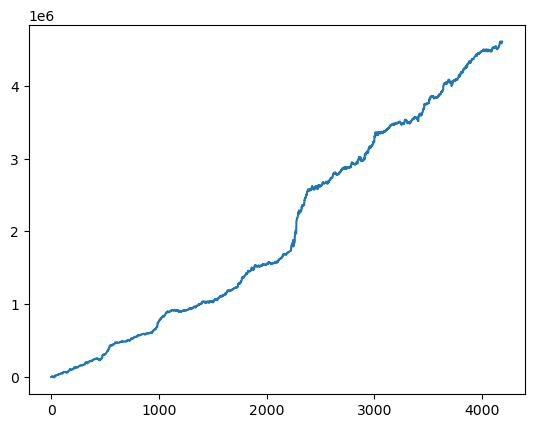

In [70]:
pnl['Cumulative PNL'] = pnl['Pnl'].cumsum()
plt.plot(pnl['Cumulative PNL'])
plt.show()

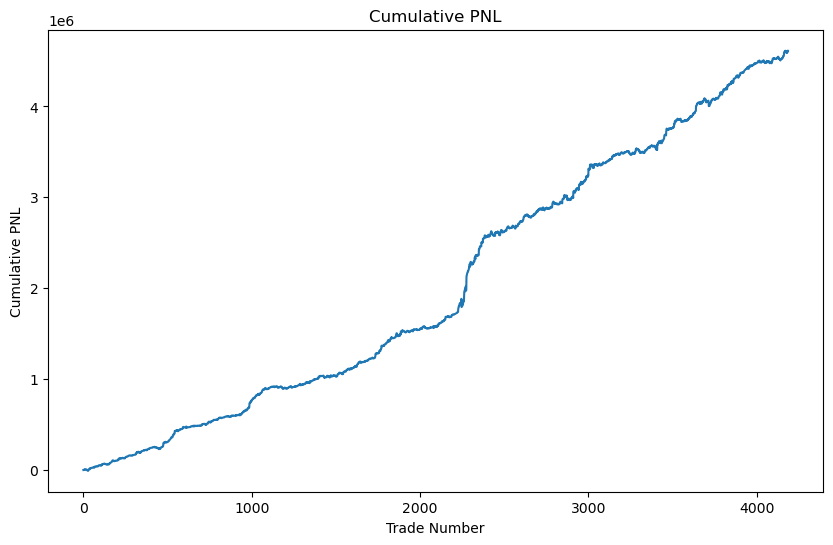

In [71]:
pnl['Cumulative PNL'].plot(figsize=(10, 6))
plt.title('Cumulative PNL')
plt.xlabel('Trade Number')
plt.ylabel('Cumulative PNL')
plt.show()

In [72]:
results.sort(key=lambda x: x[1], reverse=True)
best_hold_period = results[0][0]
best_profit = results[0][1]

In [73]:
print("Best holding period: {} minutes".format(best_hold_period))
print("Maximum profit: {:.2f}".format(best_profit))

Best holding period: 5 minutes
Maximum profit: 6526876.25
